# This code:
- Makes a stratigraphic chart of the initial and boundary conditions imposed in Wang's models
- Plots the initial and boundary conditions imposed in Wang's models as a map

In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Stratigraphic chart 

In [2]:
path=''

#Loading time scale
SeriesEpoch=pd.read_table('Series_epoch_boundaries.csv', sep=',')

# Sea-level
#https://www.science.org/doi/10.1126/sciadv.aaz1346
Miller=pd.read_csv('Miller_et_al_2020_sea_level.csv',header=0) 

#Climatic isotopic records
#https://www.science.org/doi/10.1126/science.1059412
Zachos=pd.read_csv('zachos_291121.csv', sep=',', header=0)


# Temperature - Cramer
#https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2011JC007255
temp=pd.read_csv('Miller_Temperature.txt', sep='\t', header=0)



In [16]:
SeriesEpoch.Series_epoch_value[k+1]

66.0

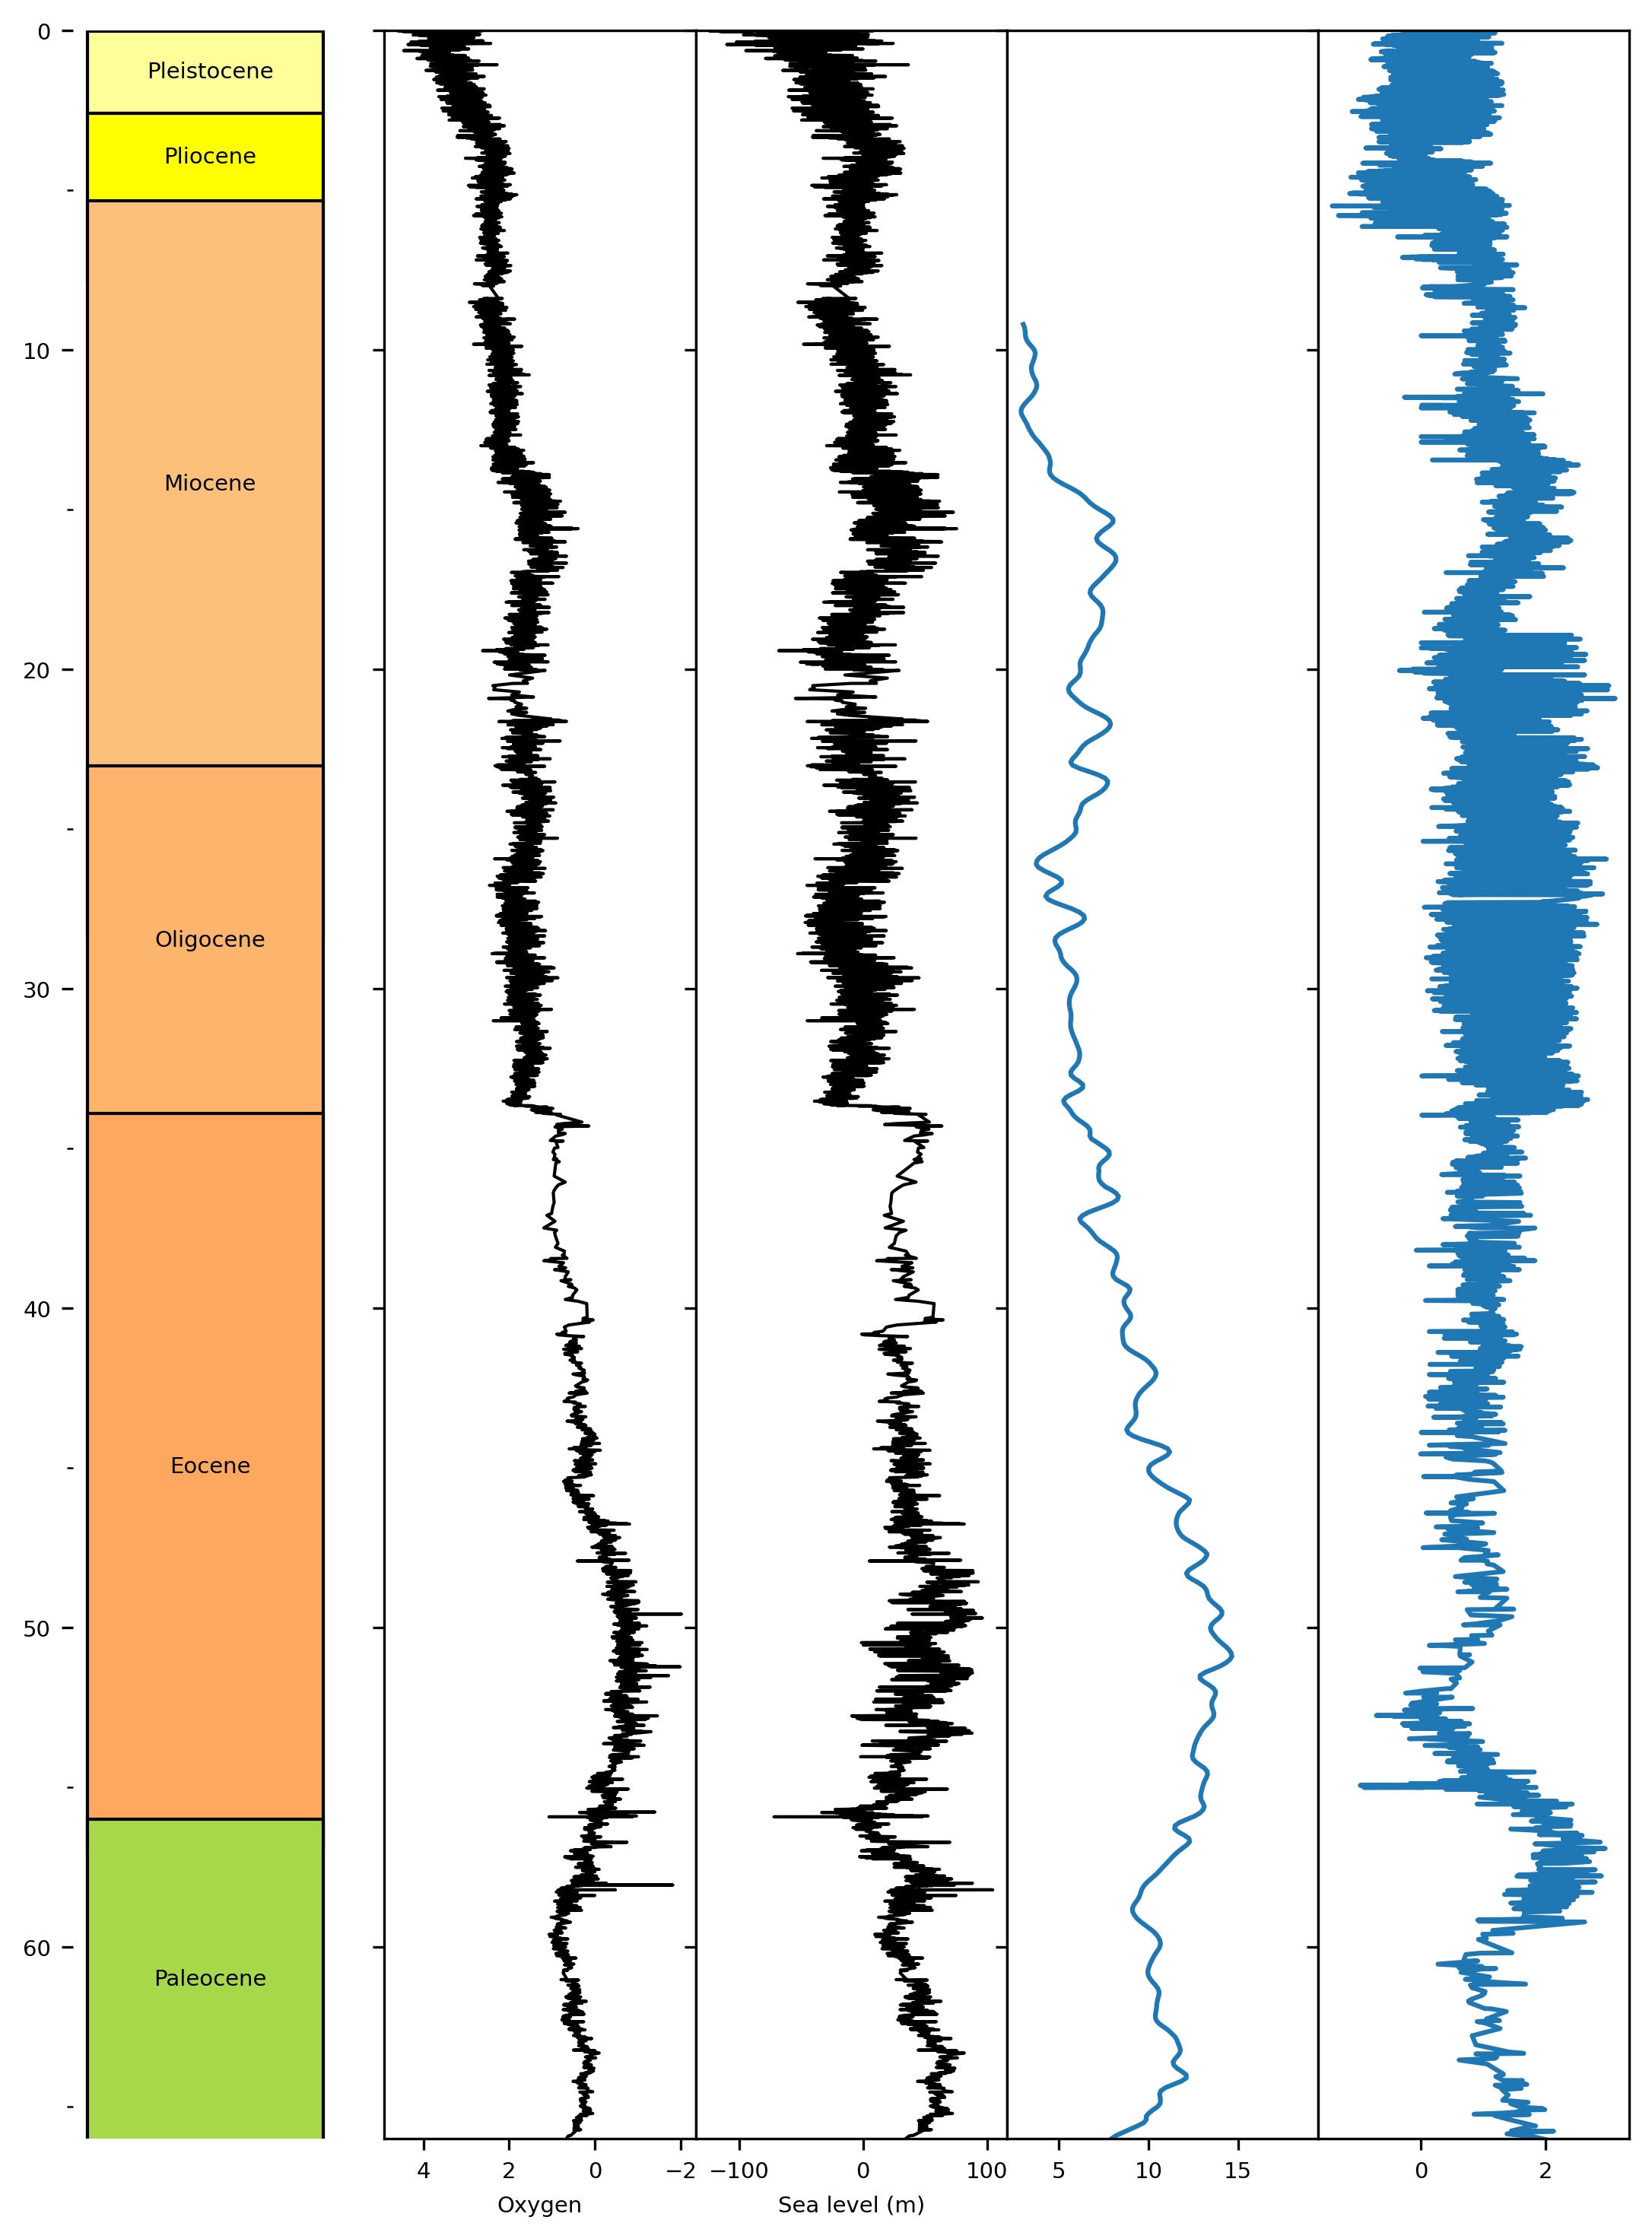

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(22/2.5,30/2.5), sharey=True, dpi=300)#constrained_layout=True
plt.rc("font", size=7); plt.rcParams['pdf.fonttype'] = 42; plt.rcParams['ps.fonttype'] = 42


vertmax=int(SeriesEpoch.Series_epoch_value[SeriesEpoch.Series_epoch_name=='L Cretaceous'])
vertdiff=10
v=0
vtext=13
v3=25
c=20
c2=30
r=26

#####################
#Ploting Epoch boxes#
#####################
ax1=plt.subplot2grid((1,5),(0,0), colspan=1, rowspan=5)

ax1.plot(np.linspace(0,c2,5), np.linspace(0,vertmax,5), alpha=0)
for k in np.arange(1,int(np.where(SeriesEpoch.Series_epoch_name=='L Cretaceous')[0])+1,1):
    rect=Rectangle((v, SeriesEpoch.Series_epoch_value[k-1]), 
                       v3,SeriesEpoch.Series_epoch_value[k],
                facecolor=(SeriesEpoch.rse[k]/255, SeriesEpoch.gse[k]/255, SeriesEpoch.bse[k]/255,1), zorder=1, edgecolor='k')
    #plt.gca().add_patch(rect)
    ax1.add_patch(rect)
    
    if k<int(np.where(SeriesEpoch.Series_epoch_name=='L Cretaceous')[0]):
        ax1.text(vtext,((SeriesEpoch.Series_epoch_value [k+1]+SeriesEpoch.Series_epoch_value [k])/2), 
                 SeriesEpoch.Series_epoch_name[k], verticalalignment='center', horizontalalignment='center')#,, rotation=90 verticalalignment='bottom'
    '''
    if k==int(np.where(SeriesEpoch.Series_epoch_name=='L Cretaceous')[0]):
        ax1.text(vtext,SeriesEpoch.Series_epoch_value [k]+2, 
             SeriesEpoch.Series_epoch_name[k], verticalalignment='top', horizontalalignment='center')#,, rotation=90 verticalalignment='bottom'
    '''
ax1.invert_yaxis()
ax1.set_ylim(vertmax,0)


###################
#Ploting sea level#
###################
#Color code green house and ice house portion?
ax2=plt.subplot2grid((1,5),(0,1), colspan=1, rowspan=5)
# plt.plot(Miller.sea_level_m, Miller.age_ka/1e3, color='k')
ax2.plot(Miller.oxygen, Miller.age_ka/1e3, color='k', linewidth=1 )
ax2.set_xlabel('Oxygen')
ax2.invert_xaxis()
ax2.invert_yaxis()
ax2.set_ylim(vertmax,0)




######



ax3=plt.subplot2grid((1,5),(0,2), colspan=1, rowspan=5)
ax3.plot(Miller.sea_level_m, Miller.age_ka/1e3, color='k', linewidth=1)
ax3.set_xlabel('Sea level (m)')
ax3.set_ylim(vertmax,0)
#ax3.invert_yaxis()  # the sea level was inverted already, therefore, no need to invert it again.


#Temperature
ax4=plt.subplot2grid((1,5),(0,3), colspan=1, rowspan=5)
ax4.plot(temp.Temperature,temp.Age)
ax4.invert_yaxis()
ax4.set_ylim(vertmax,0)

ax5=plt.subplot2grid((1,5),(0,4), colspan=1, rowspan=5)
ax5.plot( Zachos.d13C, Zachos.Age_Ma)
ax5.invert_yaxis()
ax5.set_ylim(vertmax,0)

hide_tick_labels = True
if hide_tick_labels :
    ax2.set_yticklabels([])
    ax3.set_yticklabels([])
    ax4.set_yticklabels([])
    ax5.set_yticklabels([])
    ax1.set_xticklabels([])
    ax1.set_xticks([])

# ax1.set_xticklabels([])
# ax1.set_xticks([])

# ax2.set_yticklabels([])
# ax3.set_yticklabels([])
# ax4.set_yticklabels([])




ax1.set_yticks(np.arange(0,vertmax,5), minor=True)
#ax1.set_yticklabels(np.arange(0,vertmax,10), minor=True)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)



# plt.tight_layout(0)
# plt.savefig(path+'/Documents/1.Projects/NA_drainage/Strat_chart.jpg' , dpi=300)

#Add sediment supply and tectonic+ climatic + geodynamic events + drainage evolution events + model inputs+
#add tectonic + catchment sizes from BLum Geosphere
pass

plt.subplots_adjust(wspace=0)

# plt.savefig(path+'/Documents/1.Projects/NA_drainage/Strat_chart.pdf' , dpi=300)


In [23]:
SeriesEpoch

,Series_epoch_name,Series_epoch_value,Series_epoch_error,rse,gse,bse
0,Holocene,0.0000,NaN,254,242,224
1,Pleistocene,0.0117,NaN,255,242,174
2,Pliocene,2.5800,NaN,255,255,153
3,Miocene,5.3330,NaN,255,255,0
4,Oligocene,23.0300,NaN,253,192,122
5,Eocene,33.9000,NaN,253,180,108
6,Paleocene,56.0000,NaN,253,167,95
7,L Cretaceous,66.0000,NaN,166,216,74
8,E Cretaceous,100.5000,NaN,140,205,87
9,L Jurassic,145.0000,NaN,179,227,238


In [18]:
np.arange(0,vertmax,5)

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65])